In [1]:
import numpy as np

In [2]:
# Data for dispersion curve (updated per report table)
nr_dispersion = np.array([1, 2, 3, 4, 5, 6, 7, 8])
position_dispersion = np.array([2.0, 2.7, 3.4, 7.5, 8.0, 9.0, 10.5, 11.2])
wavelength = np.array([706.5, 667.8, 587.6, 501.6, 492.2, 471.3, 447.2, 438.8])

print("Dispersion curve data (updated):")
print(f"Wavelength [nm]: {wavelength}")
print(f"Position [u]: {position_dispersion}")

Dispersion curve data (updated):
Wavelength [nm]: [706.5 667.8 587.6 501.6 492.2 471.3 447.2 438.8]
Position [u]: [ 2.   2.7  3.4  7.5  8.   9.  10.5 11.2]


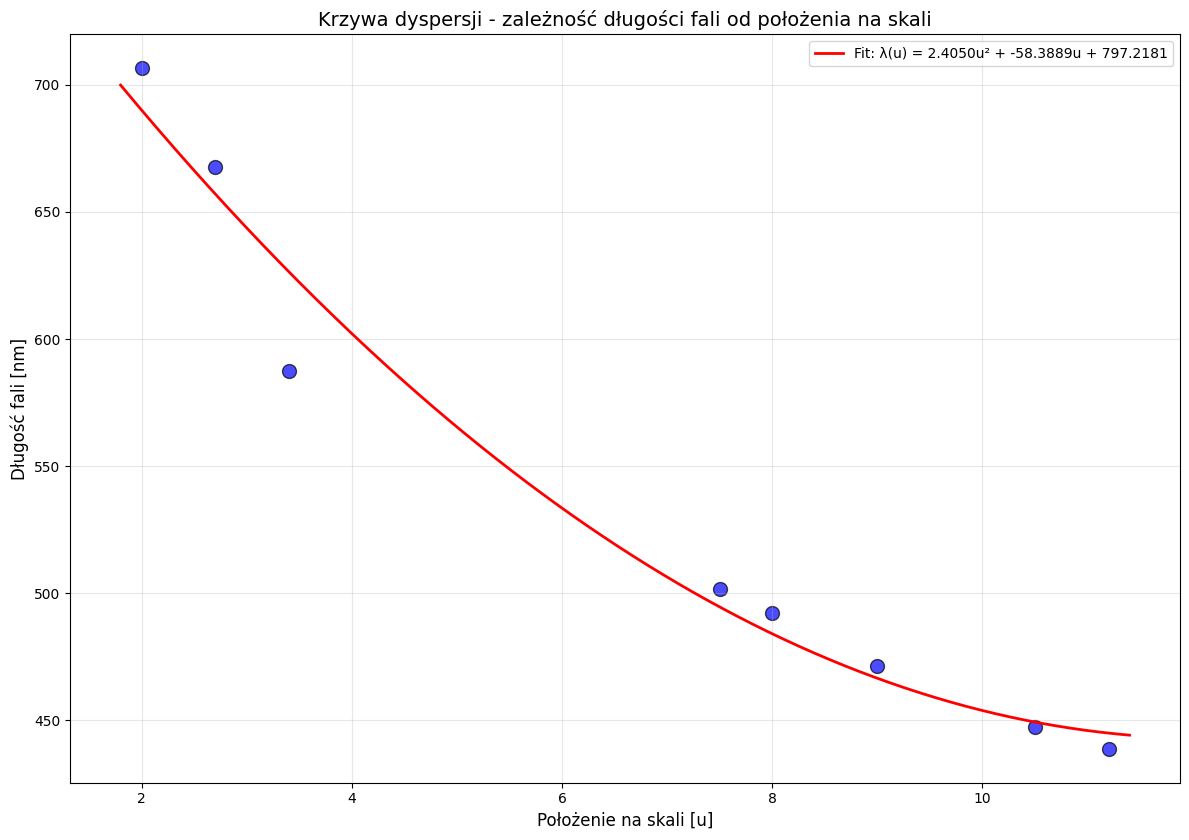

Quadratic fit coefficients (wavelength = a*u^2 + b*u + c):
a = 2.404954 ± 0.969542
b = -58.388917 ± 12.632864
c = 797.218077 ± 33.026346


In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Quadratic fit: wavelength = a*u^2 + b*u + c
# Użyj cov=True, aby uzyskać macierz kowariancji
coeffs, cov_matrix = np.polyfit(position_dispersion, wavelength, deg=2, cov=True)
a, b, c = coeffs

# Niepewności to pierwiastki z przekątnej macierzy kowariancji
unc_coeffs = np.sqrt(np.diag(cov_matrix))
unc_a, unc_b, unc_c = unc_coeffs

# --- KONIEC ZMODYFIKOWANEGO FRAGMENTU ---


# Create dispersion curve chart (reszta Twojego kodu bez zmian)
plt.figure(figsize=(12, 8.5))
plt.scatter(
    position_dispersion,
    wavelength,
    s=100,
    c="blue",
    alpha=0.7,
    edgecolors="black",
    linewidth=1,
)
# Create smooth x for fitted curve
u_fit = np.linspace(
    position_dispersion.min() - 0.2, position_dispersion.max() + 0.2, 400
)
wav_fit = np.polyval(coeffs, u_fit)

plt.plot(
    u_fit,
    wav_fit,
    color="red",
    linewidth=2,
    label=f"Fit: λ(u) = {a:.4f}u² + {b:.4f}u + {c:.4f}",
)
plt.legend()
plt.xlabel("Położenie na skali [u]", fontsize=12)
plt.ylabel("Długość fali [nm]", fontsize=12)
plt.title(
    "Krzywa dyspersji - zależność długości fali od położenia na skali", fontsize=14
)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Wyświetl wyniki wraz z niepewnościami
print("Quadratic fit coefficients (wavelength = a*u^2 + b*u + c):")
print(f"a = {a:.6f} ± {unc_a:.6f}")
print(f"b = {b:.6f} ± {unc_b:.6f}")
print(f"c = {c:.6f} ± {unc_c:.6f}")

In [4]:
def lambda_u(u):
    u = np.asarray(u, dtype=float)
    return a * u**2 + b * u + c


# Positions [u] from report tables (unknown elements)
# fmt: off
positions_unknown_1 = np.array([2.5, 3.6, 5.6, 9.0])
positions_unknown_2 = np.array( [ 0.0, 0.1, 0.7, 1.0, 1.5, 1.7, 2.0, 2.8, 3.0, 3.4, 4.5, 6.8, 8.0, 8.4, 9.4, 10.3, 10.6, ])
# fmt: on
positions_unknown_3 = np.array([1.1, 1.8, 2.4, 3.8, 4.9, 6.8])

wavelength_unknown_1 = lambda_u(positions_unknown_1)
wavelength_unknown_2 = lambda_u(positions_unknown_2)
wavelength_unknown_3 = lambda_u(positions_unknown_3)

# Round to 0.1 nm for presentation
wavelength_unknown_1_rounded = np.round(wavelength_unknown_1, 1)
wavelength_unknown_2_rounded = np.round(wavelength_unknown_2, 1)
wavelength_unknown_3_rounded = np.round(wavelength_unknown_3, 1)

print("Unknown element 1:")
print("u [u]:\n", positions_unknown_1)
print("lambda [nm]:\n", wavelength_unknown_1_rounded)
print()
print("Unknown element 2:")
print("u [u]:\n", positions_unknown_2)
print("lambda [nm]:\n", wavelength_unknown_2_rounded)
print()
print("Unknown element 3:")
print("u [u]:\n", positions_unknown_3)
print("lambda [nm]:\n", wavelength_unknown_3_rounded)

Unknown element 1:
u [u]:
 [2.5 3.6 5.6 9. ]
lambda [nm]:
 [666.3 618.2 545.7 466.5]

Unknown element 2:
u [u]:
 [ 0.   0.1  0.7  1.   1.5  1.7  2.   2.8  3.   3.4  4.5  6.8  8.   8.4
  9.4 10.3 10.6]
lambda [nm]:
 [797.2 791.4 757.5 741.2 715.  704.9 690.1 652.6 643.7 626.5 583.2 511.4
 484.  476.4 460.9 451.  448.5]

Unknown element 3:
u [u]:
 [1.1 1.8 2.4 3.8 4.9 6.8]
lambda [nm]:
 [735.9 699.9 670.9 610.1 568.9 511.4]


In [5]:
import numpy as np

# --- KROK 1: Definicja DOKŁADNYCH danych kalibracyjnych dla Helu ---
# Dane pochodzą z Tabeli 8 Twojego sprawozdania.
positions_helium = np.array([2.0, 2.7, 3.4, 7.5, 8.0, 9.0, 10.5, 11.2])
wavelengths_helium = np.array([706.5, 667.8, 587.6, 501.6, 492.2, 471.3, 447.2, 438.8])

print("--- Użyte dane wejściowe do dopasowania (Widmo Helu) ---")
print(f"Położenia [u]: {positions_helium}")
print(f"Długości fal [nm]: {wavelengths_helium}")
print("\n" + "=" * 50 + "\n")

# --- KROK 2: Dopasowanie wielomianu 2. stopnia i obliczenie niepewności ---
# Funkcja polyfit jest wywoływana TYLKO na powyższych danych.
coeffs, cov_matrix = np.polyfit(positions_helium, wavelengths_helium, deg=2, cov=True)
coeffs

--- Użyte dane wejściowe do dopasowania (Widmo Helu) ---
Położenia [u]: [ 2.   2.7  3.4  7.5  8.   9.  10.5 11.2]
Długości fal [nm]: [706.5 667.8 587.6 501.6 492.2 471.3 447.2 438.8]




array([  2.40495355, -58.38891728, 797.21807666])